# 1. HOST-BASED INTRUSION DETECTION SYSTEM #

In [ ]:
from os import listdir
from os.path import isfile, join
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import numpy as np
import pefile

benign_corpus= []
malicious_corpus = []

#	File paths
#Benign_Directory = "C:\\Users\\aycav\\Desktop\\Benign_Samples\\Benign_Samples"
#Malware_Directory = "C:\\Users\\aycav\\Desktop\\Malware Samples"

#	Taking each file
benign_exes = [f for f in listdir(Benign_Directory) if isfile(join(Benign_Directory, f))]
malicious_exes = [f for f in listdir(Malware_Directory) if isfile(join(Malware_Directory, f))]

In [16]:
#	Generating benign exes' dlls
for f in benign_exes:
	filePath = join(Benign_Directory, f)
	try:
		pe = pefile.PE(filePath)
		importList = []
		for entry in pe.DIRECTORY_ENTRY_IMPORT:
			dll = str(entry.dll)
			dll = dll[1:].replace("'","")
			dll = dll.lower()
			dll = dll.split(".")[0]
			importList.append(dll)
		dlls = " ".join(importList)
		benign_corpus.append(dlls)
	except:
		print("Benign: " + f + " has INVALID PE")
		continue
print("Benign Corpus is collected")

Benign: accicons.exe has INVALID PE
Benign: accountscontrolhost.exe has INVALID PE
Benign: AcroLayoutRecognizer.exe has INVALID PE
Benign: actionuriserver.exe has INVALID PE
Benign: addsuggestedfolderstolibrarydialog.exe has INVALID PE
Benign: agentactivationruntimestarter.exe has INVALID PE
Benign: agentservice.exe has INVALID PE
Benign: aitstatic.exe has INVALID PE
Benign: AnyDesk.exe has INVALID PE
Benign: APO3GUI.exe has INVALID PE
Benign: appcmd.exe has INVALID PE
Benign: appidcertstorecheck.exe has INVALID PE
Benign: appidpolicyconverter.exe has INVALID PE
Benign: appidtel.exe has INVALID PE
Benign: ApplicationActivationHelper.exe has INVALID PE
Benign: applysettingstemplatecatalog.exe has INVALID PE
Benign: ApplyTrustOffline.exe has INVALID PE
Benign: appresolverux.exe has INVALID PE
Benign: approvechildrequest.exe has INVALID PE
Benign: appvclient.exe has INVALID PE
Benign: AppVDllSurrogate.exe has INVALID PE
Benign: AppVNice.exe has INVALID PE
Benign: AppVShNotify.exe has INVA

Benign: MSTest.ni.exe has INVALID PE
Benign: mstsc.exe has INVALID PE
Benign: musnotification.exe has INVALID PE
Benign: musnotificationux.exe has INVALID PE
Benign: musnotifyicon.exe has INVALID PE
Benign: MySQLWorkbench.exe has INVALID PE
Benign: narrator.exe has INVALID PE
Benign: narratorquickstart.exe has INVALID PE
Benign: net1.exe has INVALID PE
Benign: netdom.exe has INVALID PE
Benign: nfsclnt.exe has INVALID PE
Benign: nfssvc.exe has INVALID PE
Benign: nltest.exe has INVALID PE
Benign: nmbind.exe has INVALID PE
Benign: nmscrub.exe has INVALID PE
Benign: notepad.exe has INVALID PE
Benign: ntdsutil.exe has INVALID PE
Benign: ntoskrnl.exe has INVALID PE
Benign: nvspinfo.exe has INVALID PE
Benign: ocspsvc.exe has INVALID PE
Benign: omadmclient.exe has INVALID PE
Benign: oobeldr.exe has INVALID PE
Benign: oobenetworkcaptiveportal.exe has INVALID PE
Benign: oobenetworkconnectionflow.exe has INVALID PE
Benign: openwith.exe has INVALID PE
Benign: osk.exe has INVALID PE
Benign: osmadmi

Benign: wbengine.exe has INVALID PE
Benign: wcsetupagent.exe has INVALID PE
Benign: wdscapture.exe has INVALID PE
Benign: wdsmcast.exe has INVALID PE
Benign: webmanagement.exe has INVALID PE
Benign: WerFault.exe has INVALID PE
Benign: WerFaultSecure.exe has INVALID PE
Benign: wermgr.exe has INVALID PE
Benign: wfs.exe has INVALID PE
Benign: WHAT.EXE has INVALID PE
Benign: whatsnewapp.exe has INVALID PE
Benign: WiDiToast.exe has INVALID PE
Benign: wifitask.exe has INVALID PE
Benign: wimserv.exe has INVALID PE
Benign: win32webviewhost.exe has INVALID PE
Benign: winbiodatamodeloobe.exe has INVALID PE
Benign: windeploy.exe has INVALID PE
Benign: windowsinternal.composableshell.experiences.textinput.inputapp.exe has INVALID PE
Benign: windowssandbox.exe has INVALID PE
Benign: wininit.exe has INVALID PE
Benign: winload.exe has INVALID PE
Benign: winlogon.exe has INVALID PE
Benign: winpeshl.exe has INVALID PE
Benign: winrecfg.exe has INVALID PE
Benign: winresume.exe has INVALID PE
Benign: wins

In [27]:
#	Generating malware exes' dlls
for f in malicious_exes:
	filePath = join(Malware_Directory, f)
	try:
		pe = pefile.PE(filePath)
		importList = []
		for entry in pe.DIRECTORY_ENTRY_IMPORT:
			dll = str(entry.dll)
			dll = dll[1:].replace("'","")
			dll = dll.lower()
			dll = dll.split(".")[0]
			importList.append(dll)
		dlls = " ".join(importList)
		malicious_corpus.append(dlls)
	except:
		print("Malicious: " + f + " has invalid PE")
		continue
print("Malicious corpus is collected")

Malicious: 027cc450ef5f8c5f653329641ec1fed9.exe has invalid PE
Malicious: GREEN.EXE has invalid PE
Malicious: malware.exe has invalid PE
Malicious: soy.exe has invalid PE
Malicious: TOKYO_1258.EXE has invalid PE
Malicious: Y-L3052.EXE has invalid PE
Malicious: Y-TP46.EXE has invalid PE
Malicious: YAUNCH.EXE has invalid PE
Malicious: YEKE1204.EXE has invalid PE
Malicious: YESMILE.EXE has invalid PE
Malicious: ZHR1958.EXE has invalid PE
Malicious: ZHR2970.EXE has invalid PE
Malicious corpus is collected


In [28]:
#	Number of Benign Exes
numBenign = len(benign_corpus)
print()
print("Number of benign samples:")
print(numBenign)

#	Number of Malicious Exes
numMal = len(malicious_corpus)
print()
print("Number of malicious samples:")
print(numMal)
target = numBenign*[0] + numMal*[1]


Number of benign samples:
2174

Number of malicious samples:
133


In [29]:
#	combining corpus
corpus = benign_corpus + malicious_corpus

print(len(corpus))

2307


In [13]:
print(benign_corpus[0:10])
print(malicious_corpus[0:10])

['advapi32 kernel32 msvcrt shell32', 'kernel32 user32 advapi32 shell32 msvcp140 vcruntime140 api-ms-win-crt-runtime-l1-1-0 api-ms-win-crt-string-l1-1-0 api-ms-win-crt-filesystem-l1-1-0 api-ms-win-crt-heap-l1-1-0 api-ms-win-crt-stdio-l1-1-0 api-ms-win-crt-math-l1-1-0 api-ms-win-crt-locale-l1-1-0', '3dviewer', 'kernel32 user32 advapi32 shell32', 'oleaut32 user32 advapi32 msvcrt kernel32', 'oleaut32 user32 advapi32 msvcrt kernel32', 'comctl32 comdlg32 gdi32 oleaut32 ole32 user32 advapi32 shell32 msvcrt kernel32', 'comctl32 comdlg32 gdi32 oleaut32 ole32 user32 advapi32 shell32 msvcrt kernel32', 'shell32 kernel32', 'kernel32']
['kernel32 user32 advapi32 shell32 ole32 crypt32 shlwapi iphlpapi ws2_32 mpr netapi32 dhcpsapi msvcrt', 'mscoree', 'mscoree', 'shlwapi kernel32 user32 advapi32 shell32', 'kernel32 advapi32 msvcrt user32', 'kernel32 advapi32 psapi shell32 shlwapi urlmon wininet', 'mscoree', 'kernel32 user32 gdi32 shell32 advapi32 comctl32 ole32 version', 'advapi32 comctl32 gdi32 kernel

In [14]:
#	vectorizing
vectorizer = TfidfVectorizer()
response = vectorizer.fit_transform(corpus)

print(vectorizer.get_feature_names())

['10', '14', '19', '1_1', '1_49', '20', '26', '30', '3dviewer', 'aahook', 'aahook_x64', 'access', 'ace', 'aclui', 'ad_globals', 'ad_log', 'adefs', 'adencrypt', 'adfs_globals', 'adisodll', 'adshattrdefs', 'advapi32', 'amsi', 'ansi', 'api', 'apiclient', 'apiquery', 'app', 'appcontainer', 'apphelp', 'appmodel', 'appvisvsubsystems32', 'appvisvsubsystems64', 'appvmanifest', 'appvpolicy', 'appwiz', 'assuan', 'atl', 'atl100', 'audit', 'auditpolcore', 'authz', 'base', 'basichttp', 'batchparser', 'batmeter', 'batmgrdll', 'bcd', 'bcrypt', 'bdehdcfglib', 'bderepair', 'bdeui', 'bindctx', 'boost_date_time', 'boost_regex', 'boost_thread', 'bootux', 'bthprops', 'bz2', 'c10', 'c10_cuda', 'c_3_1', 'cabinet', 'caffe2', 'caffe2_gpu', 'capability', 'ccl', 'certcli', 'certenroll', 'cfgmgr32', 'charset', 'chrome_elf', 'classicprovider', 'classinstallers', 'clb', 'clbcatq', 'clipc', 'clusapi', 'cmpbk32', 'cmutil', 'colorui', 'com', 'combase', 'comctl32', 'comdlg32', 'comerr64', 'common', 'compdat', 'compute'

In [15]:
transformed_corpus = vectorizer.transform(corpus)

#the number will represent the weights
print(transformed_corpus)

  (0, 546)	0.6184229637164015
  (0, 398)	0.5404658886689443
  (0, 271)	0.30570931604172263
  (0, 21)	0.4816549337635947
  (1, 683)	0.41530100358185346
  (1, 646)	0.07736845959520693
  (1, 634)	0.0569686039198615
  (1, 578)	0.06822231130956898
  (1, 573)	0.0756461676855527
  (1, 546)	0.06658749493634097
  (1, 521)	0.07064926935023087
  (1, 385)	0.0929947897499657
  (1, 362)	0.41530100358185346
  (1, 338)	0.07545399705921152
  (1, 323)	0.07507351214062637
  (1, 279)	0.41530100358185346
  (1, 271)	0.03291665854642419
  (1, 232)	0.06370196831274529
  (1, 187)	0.09116130742074226
  (1, 105)	0.4949225946089245
  (1, 24)	0.41530100358185346
  (1, 21)	0.05186126218585049
  (2, 8)	1.0
  (3, 634)	0.5323375132606011
  (3, 546)	0.6222202938047845
  :	:
  (2326, 21)	0.1807049081214414
  (2327, 634)	0.5323375132606011
  (2327, 546)	0.6222202938047845
  (2327, 271)	0.3075864765810531
  (2327, 21)	0.48461246102165
  (2328, 693)	0.6388572293268046
  (2328, 634)	0.2749305251173707
  (2328, 550)	0.387240

In [18]:
from sklearn.model_selection import train_test_split
X = corpus
y = target #0 for benign 1 for malicious

NameError: name 'corpus' is not defined

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state = 42)
# %33 for test size

NameError: name 'train_test_split' is not defined

In [37]:
vectorizer.fit(X_train)

TfidfVectorizer()

In [42]:
transformed_X_train = vectorizer.transform(X_train)
transformed_X_test = vectorizer.transform(X_test) 

In [44]:
print(transformed_X_train)

  (0, 364)	0.7071067811865476
  (0, 190)	0.7071067811865476
  (1, 627)	0.37407220482188563
  (1, 614)	0.2872609608492274
  (1, 543)	0.1967367122058823
  (1, 360)	0.262692599984839
  (1, 340)	0.2032217695052822
  (1, 265)	0.38363366257948006
  (1, 260)	0.38363366257948006
  (1, 250)	0.37715813768619955
  (1, 249)	0.38252464345928955
  (1, 227)	0.11395474365317616
  (1, 19)	0.1806396438451607
  (2, 309)	1.0
  (3, 340)	0.6893213529047907
  (3, 227)	0.3865306273838161
  (3, 19)	0.6127235482040677
  (4, 597)	0.540901301488313
  (4, 465)	0.3500060778061557
  (4, 462)	0.29030072381655936
  (4, 227)	0.1428776428142226
  (4, 109)	0.654932243693178
  (4, 19)	0.22648786425204592
  (5, 617)	0.24376794889647532
  (5, 586)	0.3850962959368736
  :	:
  (1559, 328)	0.045782864348836924
  (1559, 322)	0.05737998716296021
  (1559, 321)	0.06058677280293682
  (1559, 320)	0.05737998716296021
  (1559, 319)	0.05737998716296021
  (1559, 318)	0.05737998716296021
  (1559, 307)	0.4357973719568026
  (1559, 287)	0.02

In [46]:
from sklearn.ensemble import RandomForestClassifier #we can change the classifier

In [47]:
clf = RandomForestClassifier(n_estimators = 100, max_depth = 2, random_state = 0)

In [49]:
clf.fit(transformed_X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [50]:
prediction = clf.predict(transformed_X_test)
print(prediction)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [51]:
prediction = clf.predict_proba(transformed_X_test)
print(prediction)

[[0.92531092 0.07468908]
 [0.92336474 0.07663526]
 [0.91602792 0.08397208]
 ...
 [0.92320878 0.07679122]
 [0.96658058 0.03341942]
 [0.90507658 0.09492342]]


In [52]:
print(y_test)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [54]:
clf_weighted = RandomForestClassifier(n_estimators = 100, max_depth = 2, random_state = 0, class_weight = "balanced")
clf_weighted.fit(transformed_X_train, y_train)
prediction = clf_weighted.predict(transformed_X_test)
print(prediction)

[0 1 1 0 1 1 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0
 1 1 1 1 0 1 1 1 0 0 1 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0 1
 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 1 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1
 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0
 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0 1 0 1 1 1 0 1 0 1 1
 1 0 1 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 0 0 0
 1 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 0 0 0 1 0 1 0 1 1 0 1 1 1 1 0 0 0 1 0
 0 1 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 1 0 0 0 1 0 0 1 0
 0 1 0 1 0 1 0 1 1 1 0 0 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0
 0 0 1 1 1 1 0 0 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 1
 1 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 0 1 1 0 0 1 1
 0 1 1 1 0 1 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 0 1 0 0 1
 1 1 1 1 1 0 0 0 1 1 1 0 1 0 1 0 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1
 1 1 0 1 1 0 0 1 1 1 0 1 

In [68]:
from sklearn.metrics import confusion_matrix
def FPR(true_y, pred_y):
    cm = confusion_matrix(true_y, pred_y)
    N = sum(cm[0,:])
    return cm[0,1]/N
def TPR(true_y, pred_y):
    cm = confusion_matrix(true_y, pred_y)
    P = sum(cm[1,:])
    return cm[1,1]/P


In [63]:
prediction_probabilities = clf_weighted.predict_proba(transformed_X_test)
print(prediction_probabilities)

[[0.5268528  0.4731472 ]
 [0.46910434 0.53089566]
 [0.44502583 0.55497417]
 ...
 [0.47272985 0.52727015]
 [0.88648109 0.11351891]
 [0.40879053 0.59120947]]


In [64]:
def threshold_vector(vector, threshold):
    return [0 if x>=threshold else 1 for x in vector]

In [69]:
for threshold in range(100):
    threshold_scaled = float(threshold)/100
    thresholded_prediction = threshold_vector(prediction_probabilities[:,0], threshold_scaled)
    print(threshold, FPR(y_test, thresholded_pred
                         iction), TPR(y_test, thresholded_prediction))

0 0.0 0.0
1 0.0 0.0
2 0.0 0.0
3 0.0 0.0
4 0.0 0.0
5 0.0 0.0
6 0.0 0.0
7 0.0 0.0
8 0.0 0.0
9 0.0 0.0
10 0.0 0.0
11 0.0 0.0
12 0.0 0.0
13 0.0 0.0
14 0.0 0.0
15 0.0 0.0
16 0.0 0.0
17 0.0 0.0
18 0.0 0.0
19 0.0 0.0
20 0.0 0.0
21 0.0 0.0
22 0.0 0.0
23 0.0 0.0
24 0.0 0.0
25 0.0 0.0
26 0.0 0.0
27 0.0 0.0
28 0.0 0.0
29 0.0 0.0
30 0.0 0.0
31 0.0 0.0
32 0.0 0.0
33 0.0 0.0
34 0.0 0.0
35 0.0 0.0
36 0.0 0.0
37 0.0 0.0
38 0.0 0.0
39 0.0 0.0
40 0.0 0.041666666666666664
41 0.015256588072122053 0.14583333333333334
42 0.04576976421636616 0.3333333333333333
43 0.11511789181692095 0.375
44 0.19833564493758668 0.5833333333333334
45 0.3287101248266297 1.0
46 0.3841886269070735 1.0
47 0.4868238557558946 1.0
48 0.5436893203883495 1.0
49 0.550624133148405 1.0
50 0.5520110957004161 1.0
51 0.5520110957004161 1.0
52 0.5547850208044383 1.0
53 0.6185852981969486 1.0
54 0.6185852981969486 1.0
55 0.6185852981969486 1.0
56 0.6185852981969486 1.0
57 0.6185852981969486 1.0
58 0.6185852981969486 1.0
59 0.6185852981969486 

# 2. NETWORK INTRUSION DETECTION SYSTEM with CICIDS2017 DATASET #

In [84]:
from IPython.display import HTML, display

In [1]:
cols = [' Destination Port',
 ' Flow Duration',
 ' Total Fwd Packets',
 ' Total Backward Packets',
 'Total Length of Fwd Packets',
 ' Total Length of Bwd Packets',
 ' Fwd Packet Length Max',
 ' Fwd Packet Length Min',
 ' Fwd Packet Length Mean',
 ' Fwd Packet Length Std',
 'Bwd Packet Length Max',
 ' Bwd Packet Length Min',
 ' Bwd Packet Length Mean',
 ' Bwd Packet Length Std',
 'Flow Bytes/s',
 ' Flow Packets/s',
 ' Flow IAT Mean',
 ' Flow IAT Std',
 ' Flow IAT Max',
 ' Flow IAT Min',
 'Fwd IAT Total',
 ' Fwd IAT Mean',
 ' Fwd IAT Std',
 ' Fwd IAT Max',
 ' Fwd IAT Min',
 'Bwd IAT Total',
 ' Bwd IAT Mean',
 ' Bwd IAT Std',
 ' Bwd IAT Max',
 ' Bwd IAT Min',
 'Fwd PSH Flags',
 ' Bwd PSH Flags',
 ' Fwd URG Flags',
 ' Bwd URG Flags',
 ' Fwd Header Length',
 ' Bwd Header Length',
 'Fwd Packets/s',
 ' Bwd Packets/s',
 ' Min Packet Length',
 ' Max Packet Length',
 ' Packet Length Mean',
 ' Packet Length Std',
 ' Packet Length Variance',
 'FIN Flag Count',
 ' SYN Flag Count',
 ' RST Flag Count',
 ' PSH Flag Count',
 ' ACK Flag Count',
 ' URG Flag Count',
 ' CWE Flag Count',
 ' ECE Flag Count',
 ' Down/Up Ratio',
 ' Average Packet Size',
 ' Avg Fwd Segment Size',
 ' Avg Bwd Segment Size',
 ' Fwd Header Length.1',
 'Fwd Avg Bytes/Bulk',
 ' Fwd Avg Packets/Bulk',
 ' Fwd Avg Bulk Rate',
 ' Bwd Avg Bytes/Bulk',
 ' Bwd Avg Packets/Bulk',
 'Bwd Avg Bulk Rate',
 'Subflow Fwd Packets',
 ' Subflow Fwd Bytes',
 ' Subflow Bwd Packets',
 ' Subflow Bwd Bytes',
 'Init_Win_bytes_forward',
 ' Init_Win_bytes_backward',
 ' act_data_pkt_fwd',
 ' min_seg_size_forward',
 'Active Mean',
 ' Active Std',
 ' Active Max',
 ' Active Min',
 'Idle Mean',
 ' Idle Std',
 ' Idle Max',
 ' Idle Min',
 ' Label']

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("ggplot")
%matplotlib inline

import glob

csvDataPath = "V:\\bitirme\\Shared\\CICIDS2107\\MachineLearningCVE"
all_files = glob.glob(csvDataPath + "/*.csv")

li = []

for filename in all_files:
    temp = pd.read_csv(filename, index_col=None, header = 0, low_memory=False)
    #, dtype='uint8'
    li.append(temp)
    print(filename)

df = pd.concat(li, axis=0, ignore_index=True)
print("finished")

V:\bitirme\Shared\CICIDS2107\MachineLearningCVE\Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
V:\bitirme\Shared\CICIDS2107\MachineLearningCVE\Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
V:\bitirme\Shared\CICIDS2107\MachineLearningCVE\Friday-WorkingHours-Morning.pcap_ISCX.csv
V:\bitirme\Shared\CICIDS2107\MachineLearningCVE\Monday-WorkingHours.pcap_ISCX.csv
V:\bitirme\Shared\CICIDS2107\MachineLearningCVE\Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
V:\bitirme\Shared\CICIDS2107\MachineLearningCVE\Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
V:\bitirme\Shared\CICIDS2107\MachineLearningCVE\Tuesday-WorkingHours.pcap_ISCX.csv
V:\bitirme\Shared\CICIDS2107\MachineLearningCVE\Wednesday-workingHours.pcap_ISCX.csv
finished


In [3]:
df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830738,53,32215,4,2,112,152,28,28,28.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2830739,53,324,2,2,84,362,42,42,42.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2830740,58030,82,2,1,31,6,31,0,15.5,21.92031,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2830741,53,1048635,6,2,192,256,32,32,32.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [9]:
targets = df[' Label'][:].values

In [10]:
targets

array([1., 1., 1., ..., 1., 1., 1.])

In [11]:
from collections import Counter
Counter(targets)

Counter({1.0: 2273097,
         2.0: 128027,
         3.0: 158930,
         4.0: 1966,
         5.0: 36,
         6.0: 1507,
         7.0: 652,
         8.0: 21,
         9.0: 7938,
         10.0: 5897,
         11.0: 5796,
         12.0: 5499,
         13.0: 231073,
         14.0: 10293,
         15.0: 11})

In [18]:
100-(2273097/len(targets)*100)

19.699633629757273

In [14]:
len(targets) - 2273097

557646

In [3]:
df.loc[(df[" Label"] == 'BENIGN'),' Label'] = 1
df.loc[(df[" Label"] == 'DDoS'),' Label'] = 2
df.loc[(df[" Label"] == 'PortScan'),' Label'] = 3
df.loc[(df[" Label"] == 'Bot'),' Label'] = 4
df.loc[(df[" Label"] == 'Infiltration'),' Label'] = 5
df.loc[(df[" Label"] == 'Web Attack � Brute Force'),' Label'] = 6
df.loc[(df[" Label"] == 'Web Attack � XSS'),' Label'] = 7
df.loc[(df[" Label"] == 'Web Attack � Sql Injection'),' Label'] = 8
df.loc[(df[" Label"] == 'FTP-Patator'),' Label'] = 9
df.loc[(df[" Label"] == 'SSH-Patator'),' Label'] = 10
df.loc[(df[" Label"] == 'DoS slowloris'),' Label'] = 11
df.loc[(df[" Label"] == 'DoS Slowhttptest'),' Label'] = 12
df.loc[(df[" Label"] == 'DoS Hulk'),' Label'] = 13
df.loc[(df[" Label"] == 'DoS GoldenEye'),' Label'] = 14
df.loc[(df[" Label"] == 'Heartbleed'),' Label'] = 15

df = df.astype(float)

In [11]:
#ISOLATION FOREST

In [4]:
df = df.replace([np.inf, -np.inf], np.nan).dropna()

In [5]:
from sklearn.ensemble import IsolationForest

In [6]:
#1. meotd
data_size = len(df)
train_size = int(data_size*0.7)
valid_size = int(data_size*0.15)

In [7]:
X_train, y_train = df[cols][:train_size], df[" Label"][:train_size].values
X_valid, y_valid = df[cols][train_size:(train_size+valid_size)], df[" Label"][train_size:(train_size+valid_size)].values
X_test, y_test = df[cols][(train_size + valid_size):], df[" Label"][(train_size + valid_size):].values

In [9]:
X_train.pop(" Label")
X_valid.pop(" Label")
X_test.pop(" Label")

2406076    13.0
2406077    13.0
2406078    13.0
2406079    13.0
2406080    13.0
           ... 
2830738     1.0
2830739     1.0
2830740     1.0
2830741     1.0
2830742     1.0
Name:  Label, Length: 424182, dtype: float64

In [28]:
X_train.head(1)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,54865.0,3.0,2.0,0.0,12.0,0.0,6.0,6.0,6.0,0.0,...,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)
print(X_test.shape)
print(y_test.shape)

(1979513, 78)
(1979513,)
(424181, 78)
(424181,)
(424182, 78)
(424182,)


In [19]:
print(type(X_train))
print(type(y_train))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [11]:
#X_train = X_train.values
#X_valid = X_valid.values
#X_test = X_test.values

X_train = X_train.replace([np.inf, -np.inf], np.nan).dropna()
X_valid = X_valid.replace([np.inf, -np.inf], np.nan).dropna()
X_test = X_test.replace([np.inf, -np.inf], np.nan).dropna()

In [47]:
iForest = IsolationForest(contamination = 0.50) 

In [ ]:
iForest.fit(X_train)

In [94]:
Counter(y_train)

Counter({1.0: 1679249,
         2.0: 128027,
         3.0: 158930,
         4.0: 1966,
         5.0: 36,
         6.0: 1507,
         7.0: 652,
         8.0: 21,
         9.0: 7938,
         10.0: 3194})

In [128]:
(128027 + 158930 + 1966 + 36 + 1507 + 652 + 21 + 7938 + 3194)/(1679249 + (128027 + 158930 + 1966 + 36 + 1507 + 652 + 21 + 7938 + 3194) )*100

15.254501594735354

In [39]:
scores = iForest.decision_function(X_valid)

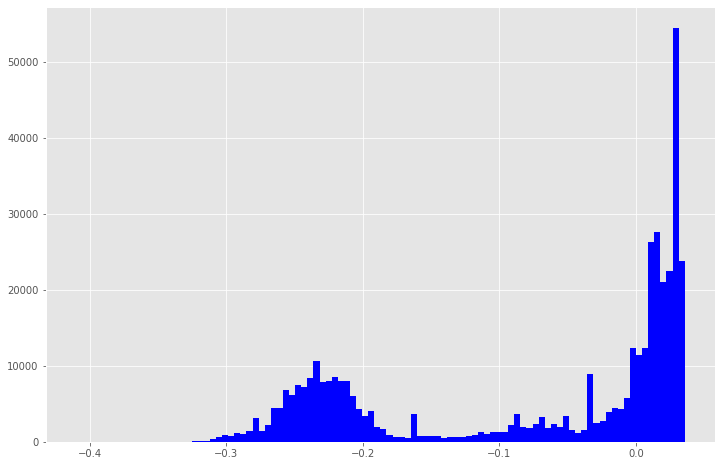

In [15]:
plt.figure(figsize=(12,8))
plt.hist(scores, bins = 100, color="b"); 

In [22]:
Counter(y_valid)

Counter({1.0: 228862, 10.0: 2703, 11.0: 5796, 12.0: 5499, 13.0: 181751})

In [92]:
#cutoff = -0.2

In [22]:
#print(Counter(y_valid[cutoff>scores]))

In [97]:
from sklearn.metrics import roc_auc_score

In [23]:
#train_roc_auc_score = roc_auc_score((cutoff<scores), y_valid == list(y_valid[' Label'] == 1))#benign
#print(str(train_auc_score*100)+"%")

In [63]:
#score_test = iForest.decision_function(X_test)

In [40]:
### another way
predictions = iForest.predict(X_valid)

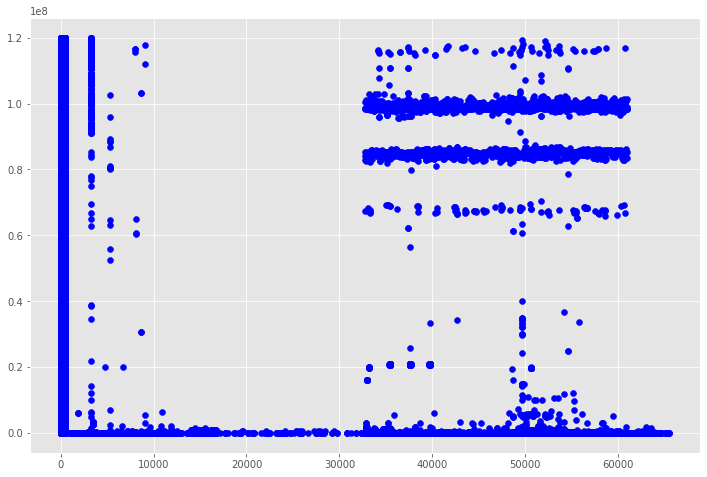

In [17]:
plt.figure(figsize=(12,8))
plt.scatter(X_valid.values[:,0], X_valid.values[:,1], color="b")

In [129]:
(predictions < 0).mean()

0.6908531793326269

In [109]:
abn_index = np.where(predictions < 0)

In [68]:
abn_index

(array([    24,     27,     48, ..., 423718, 423719, 423720], dtype=int64),)

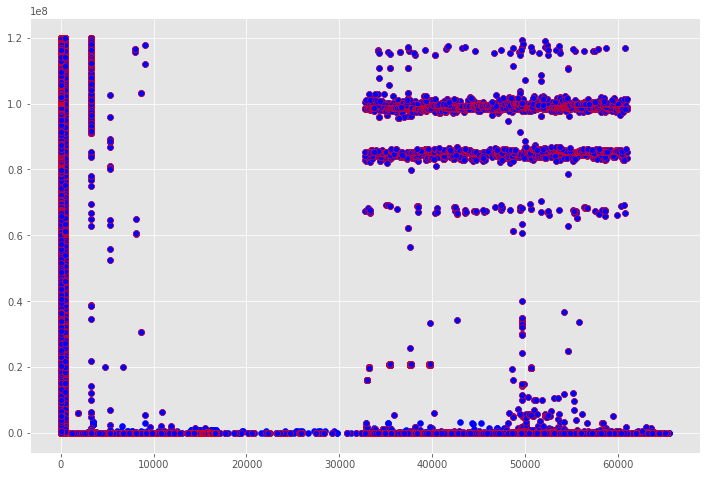

In [131]:
plt.figure(figsize=(12,8))
plt.scatter(X_valid.values[:,0], X_valid.values[:,1], color = "b")
plt.scatter(X_valid.values[abn_index,0], X_valid.values[abn_index,1] , color = "b", edgecolors="r")

In [41]:
perf_measure(y_valid,predictions)

(143423, 28045, 201167, 51546)

In [42]:
143423/(424611-228862)*100

73.26882895953491

In [78]:
len(anomaly)
Counter(y_valid)

Counter({1.0: 228862, 10.0: 2703, 11.0: 5796, 12.0: 5499, 13.0: 181751})

In [134]:
str(  195007   / (181751 + 5499 + 5796 + 2703)*100) + "%"

'99.62094314658057%'

In [82]:
195749/(228862+195749)*100

46.10078401171896

In [136]:
130992   / 228862 *100

57.23623843189346

In [92]:
X_valid: toplam malicious sayısı = 195749
         tespit edilen malicious sayısı = (true positive) =  128291 (% 73.37610920106872)
         tespit edilemeyen malicious sayısı = (false negative) = 100-73
        tespit edilen benign sayısı = (true negative) = 216255 (% 87.60388356302052)
        tespit edilemeyen benign sayısı = (false positive) = 100-87

195749

5.443891952355568

In [43]:
# X_test için yapılıyor

test_scores = iForest.decision_function(X_test)

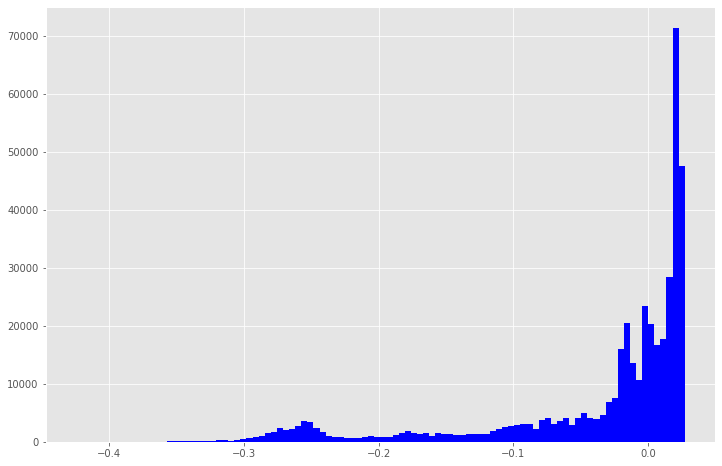

In [138]:
plt.figure(figsize=(12,8))
plt.hist(test_scores, bins = 100, color="b"); 

In [44]:
test_predictions = iForest.predict(X_test)

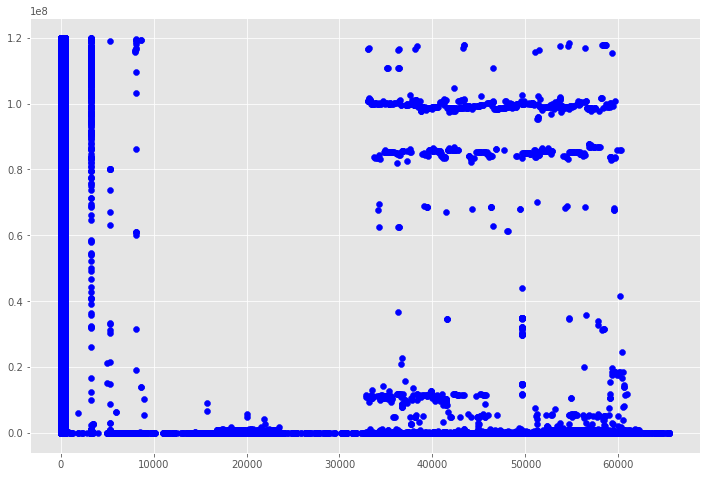

In [46]:
plt.figure(figsize=(12,8))
plt.scatter(X_test.values[:,0], X_test.values[:,1], color="b")

In [140]:
(test_predictions < 0).mean()

0.5186536108288319

In [48]:
abn_index = np.where(test_predictions < 0)

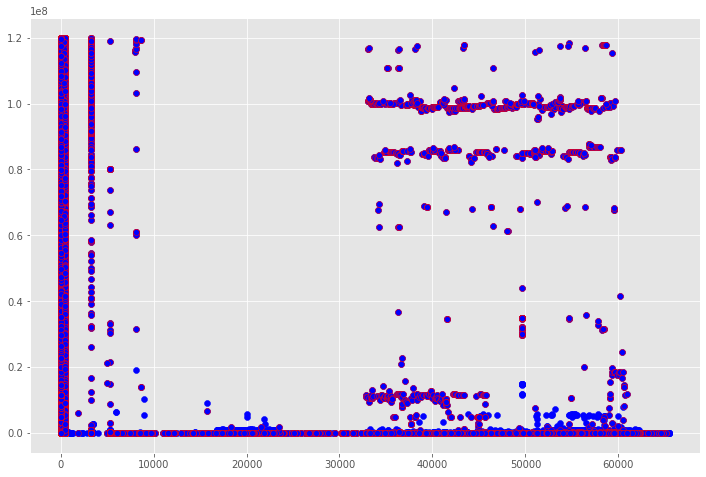

In [49]:
plt.figure(figsize=(12,8))
plt.scatter(X_test.values[:,0], X_test.values[:,1], color = "b")
plt.scatter(X_test.values[abn_index,0], X_test.values[abn_index,1] , color = "b", edgecolors="r")

In [51]:
Counter(y_test)

Counter({13.0: 49322, 1.0: 364986, 14.0: 10293, 15.0: 11})

In [45]:
perf_measure(y_test,test_predictions)

(31035, 55789, 308920, 28438)

In [ ]:
X_test: toplam malicious sayısı: 59626
        toplam benign sayısı: 364986
        tespit edilen malicious sayısı (true positive): 54.1005601583202
        tespit edilemeyen malicious sayısı (false negative): 100 - 54
        tespit edilen benign sayısı(true negative): 84.61475234666536
            false positive = 100 - 84

In [46]:
31035  / 59626*100

52.04944151880052

In [145]:
204152  / 364986 *100

55.93420021589869

In [ ]:
#contemination = auto dan .15 yapalım yarın (buraya dayanarak: https://www.youtube.com/watch?v=5p8B2Ikcw-k)

In [83]:
59626 / (59626 + 364986)*100

14.04246700517178

In [24]:
y = df.pop(" Label").values

array([1., 1., 1., ..., 1., 1., 1.])

In [25]:
X = df.values

In [14]:
X

array([[5.486500e+04, 3.000000e+00, 2.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [5.505400e+04, 1.090000e+02, 1.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [5.505500e+04, 5.200000e+01, 1.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       ...,
       [5.803000e+04, 8.200000e+01, 2.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [5.300000e+01, 1.048635e+06, 6.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [5.300000e+01, 9.493900e+04, 4.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00]])

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [19]:
Counter(y_train)

Counter({1.0: 1363105,
         3.0: 95220,
         13.0: 137797,
         2.0: 76789,
         12.0: 3280,
         14.0: 6189,
         10.0: 3514,
         9.0: 4804,
         11.0: 3473,
         4.0: 1204,
         6.0: 929,
         7.0: 383,
         5.0: 22,
         8.0: 10,
         15.0: 6})

In [22]:
contaminationParameter = 1-(1363105/len(y_train))

In [23]:
contaminationParameter

0.19662585274573074

In [27]:
iForest = IsolationForest(contamination=0.5)

In [28]:
iForest.fit(X_train)

IsolationForest(contamination=0.5)

In [29]:
valid_scores = iForest.decision_function(X_val)

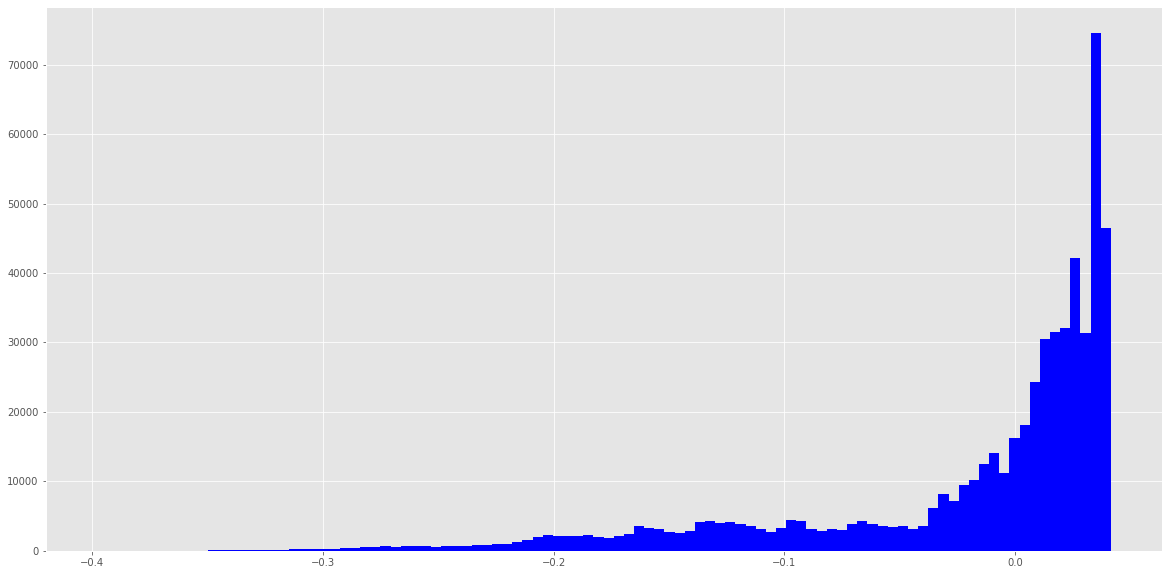

In [128]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20, 10))
_ = plt.hist(valid_scores, bins=100, color="b")

In [30]:
valid_predictions = iForest.predict(X_val)

In [88]:
abn_index = np.where(valid_predictions < 0)

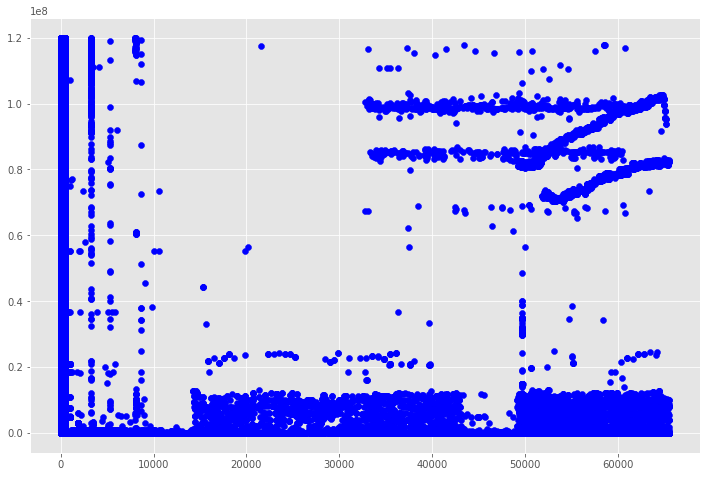

In [89]:
plt.figure(figsize=(12,8))
plt.scatter(X_val[:,0], X_val[:,1], color = "b")

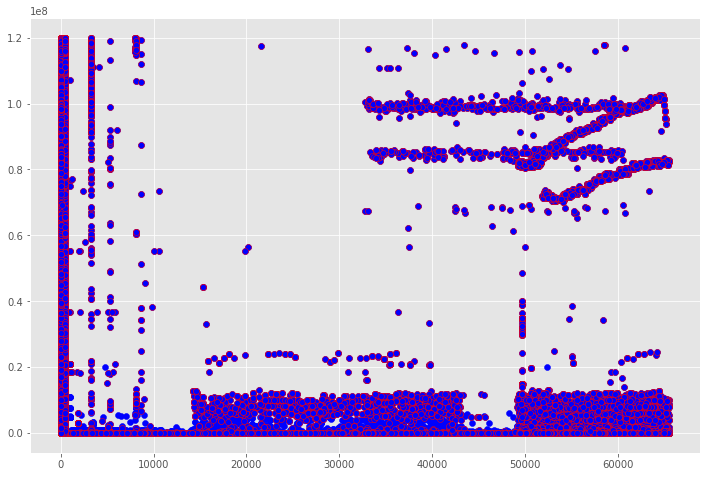

In [130]:
plt.figure(figsize=(12,8))
plt.scatter(X_val[:,0], X_val[:,1], color = "b")
plt.scatter(X_val[abn_index,0], X_val[abn_index,1] , color = "b", edgecolors="r")

In [38]:
Counter(y_val)

Counter({3.0: 31872,
         1.0: 454126,
         13.0: 46068,
         10.0: 1141,
         11.0: 1177,
         2.0: 25648,
         14.0: 2049,
         12.0: 1116,
         9.0: 1561,
         7.0: 147,
         4.0: 366,
         6.0: 287,
         8.0: 6,
         15.0: 2,
         5.0: 9})

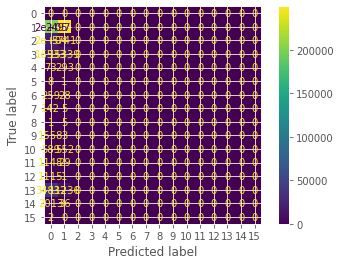

In [61]:
cm=confusion_matrix(y_val, valid_predictions)

cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot()

In [18]:
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]!=1 and y_hat[i]== -1:
            TP += 1
        if y_actual[i]==1 and y_hat[i]== -1:
            FP += 1
            
        if y_actual[i]== 1 and y_hat[i]== 1:
            TN += 1
            
        if y_actual[i]!=1 and y_hat[i]== 1:
            FN += 1
            

    return(TP, FP, TN, FN)

In [19]:
perf_measure(y_val, valid_predictions)

NameError: name 'y_val' is not defined

In [111]:
Counter(y_val)

Counter({3.0: 31872,
         1.0: 454126,
         13.0: 46068,
         10.0: 1141,
         11.0: 1177,
         2.0: 25648,
         14.0: 2049,
         12.0: 1116,
         9.0: 1561,
         7.0: 147,
         4.0: 366,
         6.0: 287,
         8.0: 6,
         15.0: 2,
         5.0: 9})

In [145]:
70444 / (565575-454126) *100

63.207386338145696

In [60]:
from sklearn.metrics import roc_auc_score
print(valid_predictions)

[1 1 1 ... 1 1 1]


In [115]:
y_val.shape

(565575,)

In [97]:
(565575-454126) / 565575*100

19.705432524422047

In [116]:
y_test.shape

(565576,)

In [117]:
y_train.shape

(1696725,)

In [118]:
Counter(y_train)

Counter({1.0: 1363105,
         3.0: 95220,
         13.0: 137797,
         2.0: 76789,
         12.0: 3280,
         14.0: 6189,
         10.0: 3514,
         9.0: 4804,
         11.0: 3473,
         4.0: 1204,
         6.0: 929,
         7.0: 383,
         5.0: 22,
         8.0: 10,
         15.0: 6})

In [121]:
100 -(1363105 / 1696725 *100)

19.662585274573075

In [146]:
test_scores = iForest.decision_function(X_test)
test_predictions = iForest.predict(X_test)

In [126]:
Counter(y_test)

Counter({1.0: 454089,
         13.0: 46259,
         3.0: 31712,
         4.0: 386,
         2.0: 25588,
         14.0: 2055,
         7.0: 122,
         9.0: 1570,
         12.0: 1103,
         11.0: 1146,
         10.0: 1242,
         6.0: 291,
         5.0: 5,
         15.0: 3,
         8.0: 5})

In [147]:
perf_measure(y_val, valid_predictions)

(70444, 211821, 242305, 41005)

In [148]:
70444 / (565576 - 454089)*100

63.18584229551427